In [1]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import math

In [2]:
# load predicted values from the previous 6-fold cross-validation as df
bert_1 = pd.read_csv('/Users/jiayun/Documents/work/bert_finetune/esol_bert_ds6_fold1_results.csv')
bert_2 = pd.read_csv('/Users/jiayun/Documents/work/bert_finetune/esol_bert_ds5_fold2_results.csv')
bert_3 = pd.read_csv('/Users/jiayun/Documents/work/bert_finetune/esol_bert_ds4_fold3_results.csv')
bert_4 = pd.read_csv('/Users/jiayun/Documents/work/bert_finetune/esol_bert_ds3_fold4_results.csv')
bert_5 = pd.read_csv('/Users/jiayun/Documents/work/bert_finetune/esol_bert_ds2_fold5_results.csv')
bert_6 = pd.read_csv('/Users/jiayun/Documents/work/bert_finetune/esol_bert_ds1_fold6_results.csv')
# concat data
bert = pd.concat((bert_1, bert_2, bert_3, bert_4, bert_5, bert_6), axis=0)

In [3]:
bert_1

,Unnamed: 0,smiles,actual,predict
0,0,NC(=O)c1cccnc1,0.610,-0.288363
1,1,Oc1ccc(c(O)c1)c3oc2cc(O)cc(O)c2c(=O)c3O,-3.083,-3.724570
2,2,Cc1ccnc(C)c1,0.380,-0.177875
3,3,NC(=N)NS(=O)(=O)c1ccc(N)cc1,-1.990,-2.431840
4,4,ClC4=C(Cl)C5(Cl)C3C1CC(C2OC12)C3C4(Cl)C5(Cl)Cl,-6.180,-5.762957
...,...,...,...,...
185,185,Nc1nccs1,-0.360,-0.123807
186,186,Brc1ccc(Br)cc1,-4.070,-3.953462
187,187,NC(=S)N,0.320,-0.148311
188,188,CCCCCC1CCCC1,-6.080,-5.059340


In [4]:
# MAE, AE and RMSE give an idea of the error distribution
print(mean_absolute_error(bert['actual'], bert['predict']))

#RMSEs
print(math.sqrt(mean_squared_error(bert['actual'], bert['predict'])))

# R^2 Coefficient of Determination
print(r2_score(bert['actual'], bert['predict']))

0.5792424860672203
0.7891404285036016
0.858192941680842


In [5]:
len(bert)

1144

In [6]:
# calculate the residual value for each molecule
bert['residual']= bert['predict']-bert['actual']

In [7]:
# calculate standardised deviation of the residuals (sdr) of the dataset
# equations used: sdr = sqrt((sum((residual)**2))/(n-2))
sdr = np.sqrt((bert['residual']**2).sum()/(len(bert)-2))
sdr

0.7898311423588124

In [8]:
# calculate how many sdr each molecule's predicted value is away from the exp value 
bert['std_residual'] = bert['residual']/sdr
bert['std_residual']

0     -1.137411
1     -0.812287
2     -0.706322
3     -0.559411
4      0.528016
         ...   
186    0.394230
187    0.867201
188   -2.402795
189   -0.670155
190   -1.013844
Name: std_residual, Length: 1144, dtype: float64

In [9]:
# n is 2 or 3. Points 2 or 3 sdr away from the prediction line are likely to be outliers
n = 3
bert_outliers = bert.loc[abs(bert['std_residual']) > n]
bert_outliers

,Unnamed: 0,smiles,actual,predict,residual,std_residual
16,16,C1CCCCCCC1,-4.150,-0.958306,3.191695,4.040983
67,67,Cc1cccc(C)n1,0.450,-2.583259,-3.033259,-3.840389
161,161,CCCCCc1ccccc1,-4.640,-2.205890,2.434110,3.081811
184,184,Cc1cc(=O)n(c2ccccc2)n1C,0.715,-1.859492,-2.574492,-3.259548
28,28,CCCCSP(=O)(SCCCC)SCCCC,-5.140,-2.301463,2.838537,3.593853
53,53,O=c2c(C3CCCc4ccccc43)c(O)c1ccccc1o2,-2.840,-5.658763,-2.818763,-3.568817
139,139,CCCCCCCCCCCCCCCCCCO,-8.400,-5.310054,3.089946,3.912160
169,169,Clc1c(Cl)c(Cl)c(c(Cl)c1Cl)c2c(Cl)c(Cl)c(Cl)c(C...,-11.600,-8.911970,2.688030,3.403297
72,72,c2c(C)cc1nc(C)ccc1c2,-1.940,-4.668228,-2.728228,-3.454191
161,161,CCOP(=O)(OCC)OCC,0.430,-2.212054,-2.642054,-3.345087


In [10]:
# Set the default text font size
plt.rc('font', size=22)

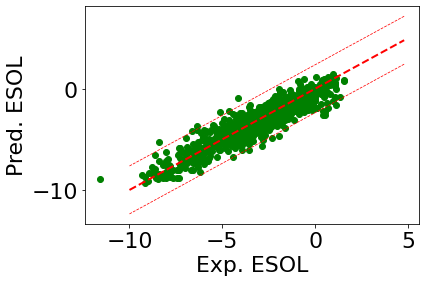

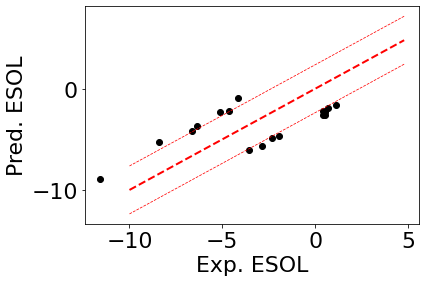

In [11]:
plt.figure(2)

# plot of exp vs pred of all molecules in the dataset
# The thick red lines indicate ideal agreement between the predicted and experimental values. 
# The dashed red lines indicate 3 srd (n=3) away from the ideal agreement. 

ln = np.arange(-10, 5, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=bert['actual'], y=bert['predict'], color='green')
plt.xlabel('Exp. ESOL')
plt.ylabel('Pred. ESOL')
plt.show()

# Plot of the outliers identified 
# check visually to confirm they are on or beyond 3 srd
ln = np.arange(-10, 5, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=bert_outliers['actual'], y=bert_outliers['predict'], color='black')
plt.xlabel('Exp. ESOL')
plt.ylabel('Pred. ESOL')
plt.show()

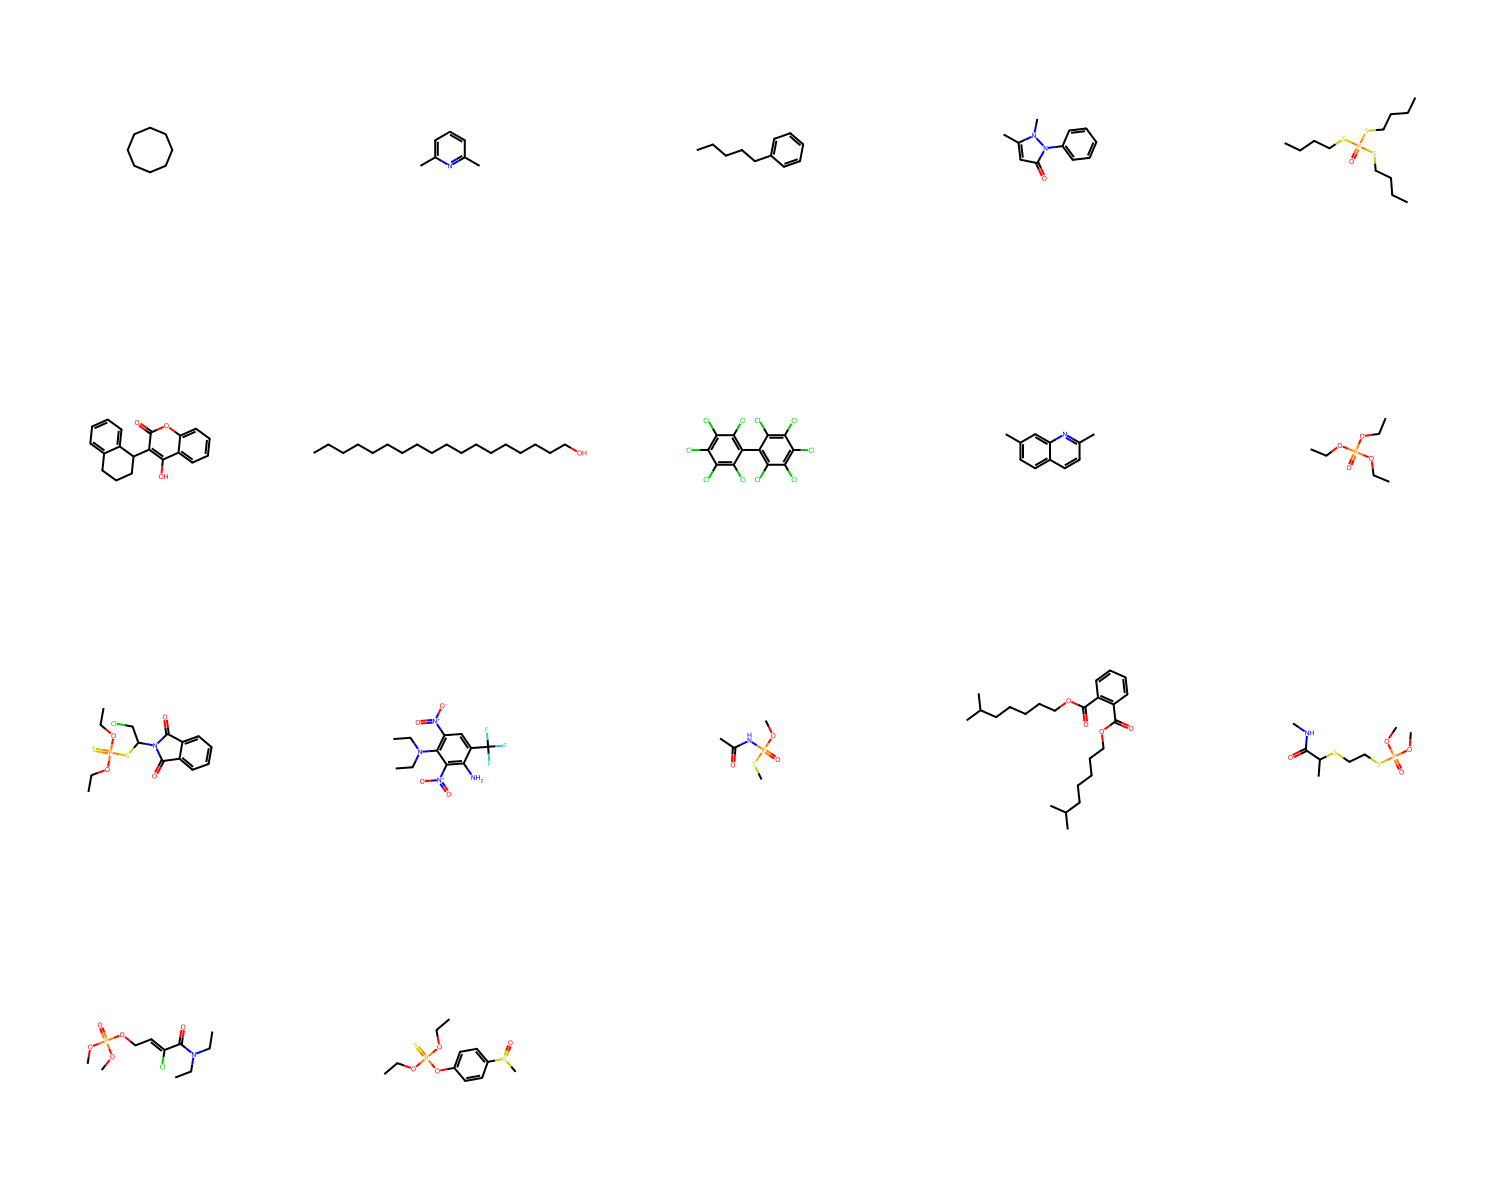

In [12]:
# draw n=3 outlier structure
outliners = [Chem.MolFromSmiles(x) for x in bert_outliers['smiles']]
Draw.MolsToGridImage(outliners, subImgSize=(300,300), molsPerRow=5, maxMols=50)

In [13]:
bert_outliers.to_csv('bert_esol_outliers3.csv')

In [14]:
# n is 2 or 3. Points 2 or 3 sdr away from the prediction line are likely to be outliers
n = 2
bert_outliers2 = bert.loc[abs(bert['std_residual']) > n]
bert_outliers2

,Unnamed: 0,smiles,actual,predict,residual,std_residual
25,25,CN(C)C(=O)N(C)C,0.940,-1.174062,-2.114062,-2.676600
30,30,CC1CC(C)C(=O)C(C1)C(O)CC2CC(=O)NC(=O)C2,-1.130,-3.089965,-1.959965,-2.481499
82,82,CC1CO1,-0.590,0.991031,1.581031,2.001733
133,133,OC(Cn1cncn1)(Cn2cncn2)c3ccc(F)cc3F,-1.800,-3.611922,-1.811922,-2.294062
139,139,C,-0.900,0.743211,1.643211,2.080459
...,...,...,...,...,...,...
111,111,CCN(CC)c1c(cc(c(N)c1N(=O)=O)C(F)(F)F)N(=O)=O,-5.470,-3.670805,1.799195,2.277949
115,115,Nc2nc1[nH]cnc1c(=O)[nH]2,-3.583,-1.847029,1.735971,2.197902
138,138,CCN(CC)C(=O)C(=CCOP(=O)(OC)OC)Cl,0.523,-2.632541,-3.155541,-3.995210
167,167,CCOP(=S)(OCC)Oc1ccc(cc1)S(C)=O,-2.300,-4.908603,-2.608603,-3.302735


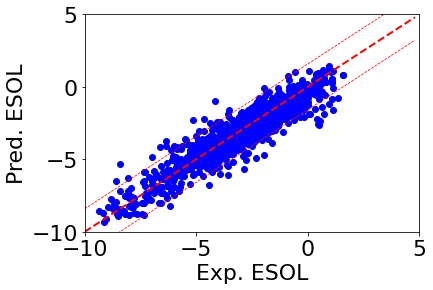

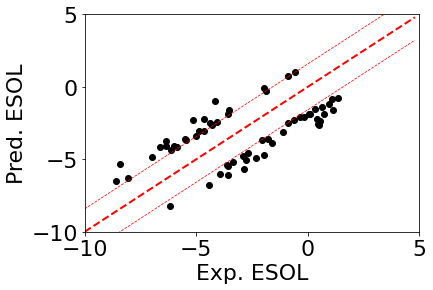

In [15]:
plt.figure(2)

# plot of exp vs pred of all molecules in the dataset
# The thick red lines indicate ideal agreement between the predicted and experimental values. 
# The dashed red lines indicate 2 srd (n=2) away from the ideal agreement. 
ln = np.arange(-10, 5, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=bert['actual'], y=bert['predict'], color='blue')
plt.xlabel('Exp. ESOL')
plt.ylabel('Pred. ESOL')
plt.xlim([-10,5])
plt.ylim([-10,5])
plt.show()

# Plot of the outliers identified 
# check visually to confirm they are on or beyond 2 srd
ln = np.arange(-10, 5, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=bert_outliers2['actual'], y=bert_outliers2['predict'], color='black')
plt.xlabel('Exp. ESOL')
plt.ylabel('Pred. ESOL')
plt.xlim([-10,5])
plt.ylim([-10,5])
plt.show()

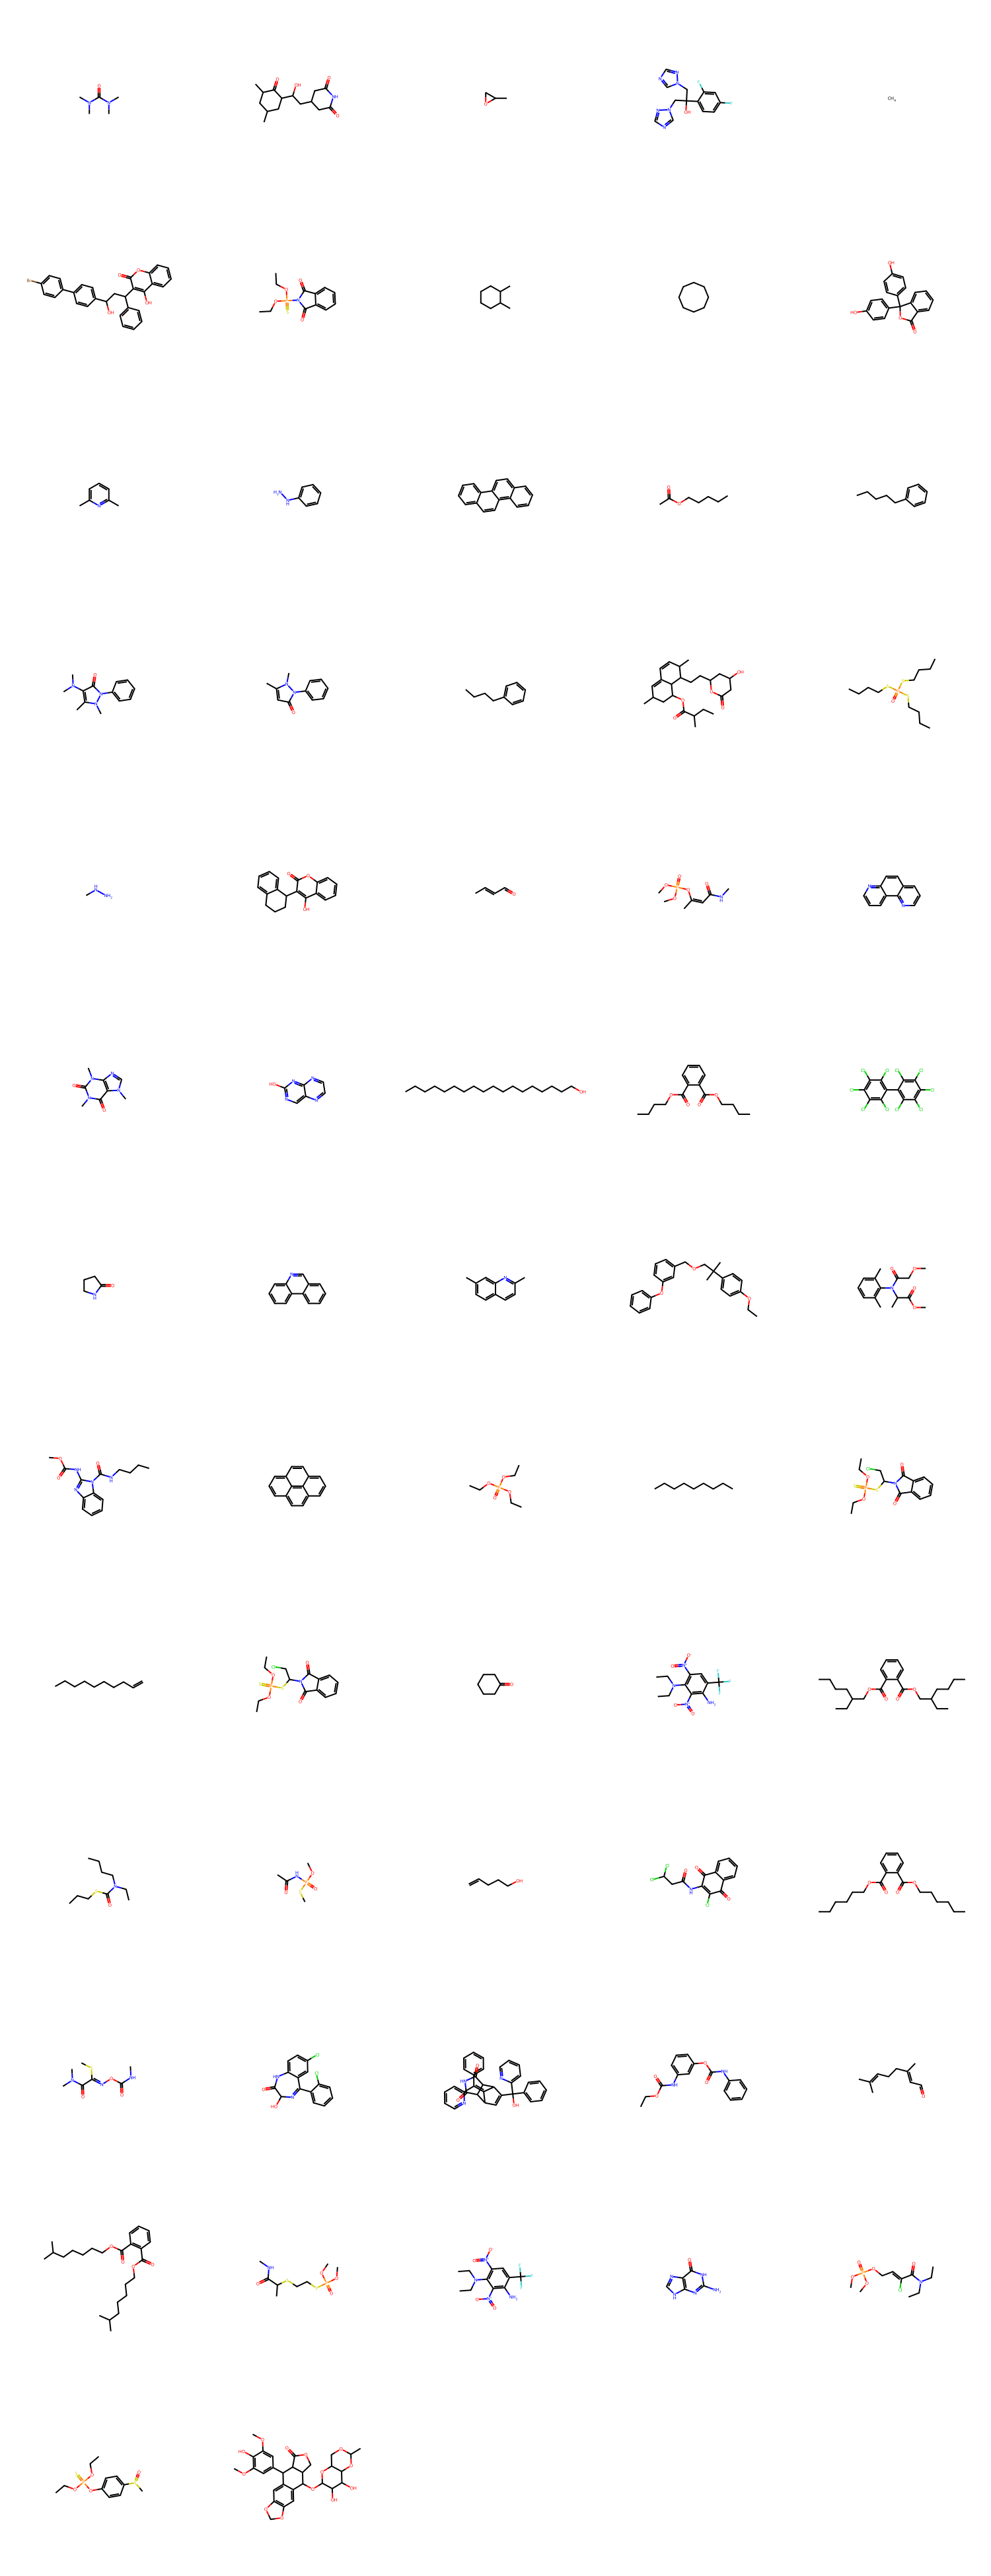

In [16]:
# draw n=2 outlier structure
outliners2 = [Chem.MolFromSmiles(x) for x in bert_outliers2['smiles']]
Draw.MolsToGridImage(outliners2, subImgSize=(300,300), molsPerRow=5, maxMols=100)

In [17]:
# save outliers (n=2) info to a csv file
bert_outliers2.to_csv('bert_esol_outliers2.csv')

In [18]:
from rdkit.Chem import Descriptors
gpHSP_data = pd.read_csv('/Users/jiayun/Documents/work/bert_finetune/esol.csv')
mol_smiles = gpHSP_data['SMILES']

# calculate molecular weight of the full dataset
molwt = [(Descriptors.ExactMolWt(Chem.MolFromSmiles(x))) for x in gpHSP_data['SMILES']]
np_molwt = np.asarray(molwt)

# calculate molecular weight of outliers
molwt_outliers2 = [(Descriptors.ExactMolWt(Chem.MolFromSmiles(x))) for x in bert_outliers2['smiles']]
np_molwt_outliers2 = np.asarray(molwt_outliers2)

# Compare average molecular weight for full data and outliers
print(np.average(np_molwt))
print(np.average(np_molwt_outliers2))

204.1519488730402
240.88506044270966


In [20]:
# Set the default text font size
plt.rc('font', size=16)

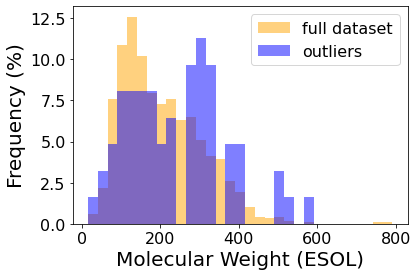

In [21]:
# plot molecular weight distribution for the full dataset and the outliers
bin_width = 25
df = pd.DataFrame(np_molwt, columns = ["full dataset"])
df2 = pd.DataFrame(np_molwt_outliers2, columns = ["outliers"])
ax = df.plot.hist(bins=(np.arange(min(molwt), max(molwt)+bin_width, bin_width)), alpha=0.5, color='orange', weights=np.ones_like(df.index) *100/ len(df))
df2.plot(kind='hist', bins=(np.arange(min(molwt_outliers2), max(molwt_outliers2)+bin_width, bin_width)), alpha=0.5, color='blue', weights=np.ones_like(df2.index) *100 /len(df2), ax=ax)
ax.set_xlabel("Molecular Weight (ESOL)", size=20)
ax.set_ylabel("Frequency (%)", size=20)
plt.show()